/home/yustiks/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/yustiks/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/yustiks/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


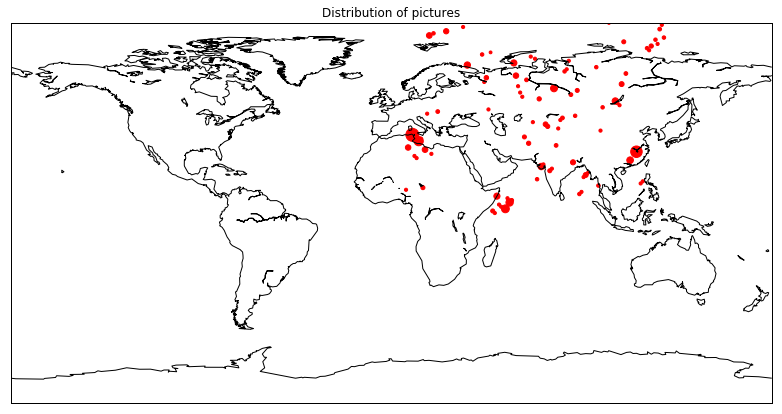

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from itertools import chain
import pandas as pd
import operator 

# import all the latitude and longitude information and plot on the map
# fp = open('/home/yustiks/Documents/data mining/project/test1_gt.txt','r')

d = dict()
lat = []
lon = []
counts = []

filepath = './Documents/data mining/project/data_mining/test1_gt.txt'  
with open(filepath) as fp:  
    line = fp.readline()
    line = fp.readline()
    lst = line.split()
    
    cnt = 1
    while line:
        lat1 = format(float(lst[1]), '.6f')
        lon1 = format(float(lst[2]), '.6f')
        t = (lat1, lon1)
        if t in d:
            d[t] += 1
        else:
            d[t] = 1
        line = fp.readline()
        lst = line.split()
        cnt += 1
# fp.close()

sorted_d = sorted(d.items(), key=operator.itemgetter(1), reverse = True)

for key in sorted_d:
    lat.append(key[0][0])
    lon.append(key[0][1])
    counts.append(key[1])
    if key[1]==8:
        break
        
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
fig = plt.figure(figsize=(15,7))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawmapboundary(fill_color='white')
plt.title('Distribution of pictures')


x, y = m(lon,lat)
size = (counts)
m.scatter(x,y,s=counts,marker='o',color='r')


In [35]:
# cleaning the data

import pandas as pd
file_meta = './Documents/data mining/project/metadata_1.csv' 
file_meta_out = './Documents/data mining/project/metadata_1_out.csv' 

#open the csv file in read mode
csvfile = open(file_meta, "r")
csvfileout = open(file_meta_out, "w")
d = dict()

#skip the first line, since it contains the column headings
csvfile.readline()

count = 0

# loop through each line in the file
for line in csvfile:
    #split each line into a list, according to the commas
    row = line.split(",")
    if (row[2] in d.keys()) and (d[row[2]]!=row[4]) or (row[2] not in d.keys()):
        d[row[2]]=row[4]
        csvfileout.write(line)
    count += 1
csvfile.close()
csvfileout.close()
        

{'75174621@N00': '"shadow france geotagged arles provencealpescôtedazur aplusphoto 025kmtoarlesinprovencealpescôtedazurfrance geo:lat=43679067 geo:lon=4630517"', '13897419@N02': '"sanfrancisco california usa church 35mm basilica scanned agfa asa200 missiondolores castrodistrict agfachrome"', '71102643@N00': '"bird animals yellow zoo sandiego colourful"', '86354760@N00': '"venice italy europe"', '83511002@N00': '"newzealand monument memorial pass trail alpine milford mackinnon greatwalk"', '99001450@N00': '"airplanes 飛行機 bech"', '45189308@N00': '""', '40814689@N00': '"california family vacation squawvalley ashby october2007vacation"', '84149521@N00': '"street shadow bw silhouette night newfoundland alley couple downtown noir noiretblanc kodak walk candid trix stjohns rangefinder 150 electro romantic gsn agfa rodinal stroll yashica pushprocessing iso1000 murraypremises"', '42875348@N00': '"shoes powerlines waterloo"', '31911001@N00': '"fortune pei"', '12739532@N08': '"sunset car newfound

In [37]:
import operator
big_file = "./Documents/data mining/project/training_latlng"
file = open(big_file, "r")
file.readline()
l = []
ln = []
counts = []
d = dict()
for line in file:
    #split each line into a list, according to the commas
    row = line.split()
    t = (row[1],row[2])
    if t in d.keys():
        d[t]+=1
    else:
        d[t]=1
        
sorted_d = sorted(d.items(), key=operator.itemgetter(1), reverse = True)

for key in sorted_d:
    l.append(key[0][0])
    ln.append(key[0][1])
    counts.append(key[1])
    if key[1]<=250:
        break

file.close()

In [38]:
print(len(l))

1177


/home/yustiks/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/yustiks/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/yustiks/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


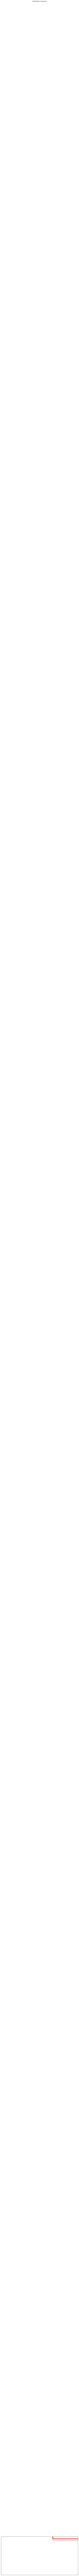

In [45]:
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
fig = plt.figure(figsize=(15,7))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawmapboundary(fill_color='white')
plt.title('Distribution of pictures')
x, y = m(ln,l)
m.scatter(x,y,1,marker='o',color='r')